# <div align = 'center'> Lectura 8 Series de Tiempo IV</div>
### Contenido
  <div align = 'left'>
      <font color = 'steelblue' size = 4>
        8.1 Autocorrelación total y parcial<br>
        8.2 train / test validación <br>
          </font>
        </div>

### Autocorrelación total y parcial

La autocorrelación es la medida de correlación entre una variable y sus valores pasados. En autocorrelación total, la correlación entre la observación $ X_t $ y la observación $ X_ {t - p} $ se calcula teniendo en cuenta la dependencia lineal de las observaciones intermedias $ X_ {t - 1}, X_ {t - 2}, \ldots, X_ {t - p + 1} $. La autocorrelación parcial, por otro lado, calcula la correlación entre la observación $ X_ {t} $ y $ X_ {t - p} $ eliminando la dependencia lineal de las observaciones intermedias.

Usaremos la información de ventas contenida en el archivo ```shampoo.csv``` para ilustrar la creación de los dos gráficos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('shampoo.csv')
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
2000-01-01,266.0
2000-02-01,145.9
2000-03-01,183.1
2000-04-01,119.3
2000-05-01,180.3


Para crear las gráficas de autocorrelación parcial y total, usaremos las funciones ```plot_pacf ()``` y ```plot_acf()```, respectivamente. Las dos funciones forman parte del subpaquete ```statsmodels.graphics.tsaplots``` y reciben como parámetro la ```Series``` que contiene la serie temporal y el parámetro ```lags``` para definir el número de periodos considerados.
Para corregir _bugs_ al crear el gráfico, agregaremos el comando ```plt.show()```.

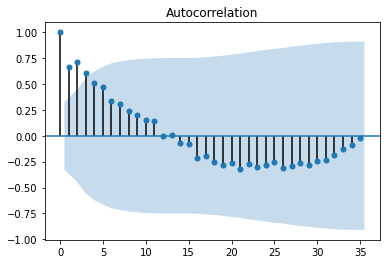

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df.Sales, lags=35)
plt.show()

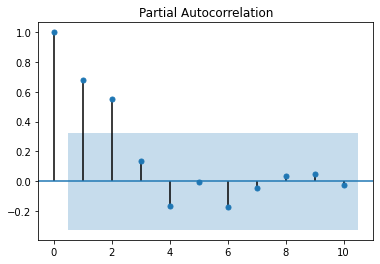

In [3]:
plot_pacf(df.Sales, lags=10)
plt.show()

Usamos la autocorrelación parcial como indicador para elegir el valor $ p $ para el modelo autorregresivo AR ($ p $). Para analizar la autocorrelación parcial utilizamos el gráfico de autocorrelación parcial. Configuraremos el parámetro ```lags = 10```, para mostrar solo los primeros 10 _lags_.

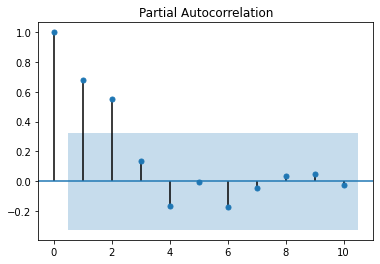

In [4]:
plot_pacf(df.Sales, lags=10)
plt.show()

El resultado obtenido es un gráfico que tiene como ejes $ x $ y $ y $ el número de _lags_ y la autocorrelación parcial, respectivamente.

Estamos interesados en el último valor de autocorrelación que no forma parte de la región de baja significación representada por el área azul claro. El valor de autocorrelación para $ p = 0 $ siempre será $1$, ya que la correlación de una variable consigo misma siempre será. Para $ p> 0 $, vemos que $ p = 2 $ tiene es el último valor de autocorrelación parcial entre los _lags_ con significación estadística.

## _train / test_ validación

Dependiendo del modelo predictivo aplicado a una serie de tiempo, corremos el riesgo de encontrarnos con problemas de _overfitting_ o _sobreajuste_. Por lo tanto, necesitamos establecer un procedimiento de prueba con la dinámica _train / test_.

Imaginemos el modelo predictivo como un estudiante que necesita estudiar para una prueba. Para ello, intenta resolver una serie de preguntas a partir de una lista de ejercicios. Si la prueba contiene las mismas preguntas (o un subconjunto) de la lista de ejercicios, corremos el riesgo de que el alumno haya memorizado las respuestas, obteniendo una nota alta sin haber aprendido realmente el contenido. Por otro lado, cuando se aplican nuevas preguntas a la prueba, el alumno debe haber aprendido sobre el contenido para obtener una calificación satisfactoria.

La misma lógica se puede aplicar a la validación de modelos de series de tiempo. Considerando una serie con $ n $ períodos, es decir, $ t = 1, 2, \ldots, n $, dividiremos el conjunto de períodos en $2$. Uno reservado para el "entrenamiento" del modelo y el otro para "testear"lo mismo.

Para las series de tiempo, el conjunto que contiene los períodos más antiguos siempre se utilizará como conjunto de entrenamiento. El tamaño del conjunto de entrenamiento también debe ser siempre mayor que el conjunto de prueba. Esta división generalmente obedece a la regla: entrenamiento (2/3) y prueba (1/3).

Aplicando el comando de Python ```len()``` a la ```Serie```, obtenemos el número de puntos para ello. De esta forma, multiplicaremos el número total de períodos por $2/3$ y aplicaremos el resultado en el comando python ```int()```, de modo que el resultado sea siempre un número entero. Llamaremos al resultado final ```train_size```.

In [23]:
train_size = int(len(df.Sales) * 2 / 3)
train_size

24

El conjunto de entrenamiento contendrá los primeros períodos de la serie de tiempo ```train_size = 24```. Usaremos el comando ```Series [:n]``` para filtrar los primeros $n$ valores, dando al resultado el nombre ```train_set```. Para el conjunto de prueba llamado ```test_set```, usaremos el comando  ```Series [n:]```.

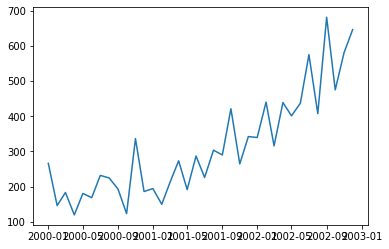

In [26]:
plt.plot(df.Sales)

In [24]:
train_set = df.Sales[:train_size]
test_set = df.Sales[train_size:]

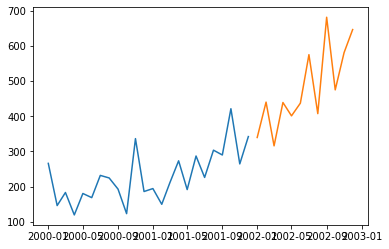

In [25]:
plt.plot(train_set)
plt.plot(test_set)

Ahora crearemos un modelo autorregresivo de orden 2 (AR (2)) a partir del conjunto de entrenamiento ```train_set```. Accediendo al atributo ```params``` obtenemos los parámetros del modelo AR (2).

In [31]:
from statsmodels.tsa.ar_model import AR

ar_2 = AR(train_set, freq='MS').fit(2)
print(ar_2.summary())

                               AR Model Results                               
Dep. Variable:                      S  -                  a                  l
Model:                          AR(2)   Log Likelihood                -122.127
Method:                          cmle   S.D. of innovations             62.319
Date:                Mon, 23 Aug 2021   AIC                              8.628
Time:                        00:49:48   BIC                              8.827
Sample:                    01-01-2000   HQIC                             8.675
                         - 12-01-2001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.0055     58.393      1.404      0.160     -32.443     196.454
L1.Sales       0.1832      0.203      0.903      0.367      -0.215       0.581
L2.Sales       0.4887      0.203      2.409      0.0

In [33]:
print(ar_2.params)

const       82.005541
L1.Sales     0.183201
L2.Sales     0.488723
dtype: float64


Con base en los parámetros del modelo AR (2), podemos aplicar lo mismo usando la ecuación
$$ X_t = 82,00 + 0,18 X_ {t-1} + 0,48 X_ {t - 2} $$

Para obtener las predicciones para el conjunto de prueba ```test_set```, aplicaremos la ecuación anterior a este conjunto. Asignaremos los resultados a una variable llamada ```pronósticos```.

In [37]:
predicciones = ar_2.params[0] + test_set.shift(1) * ar_2.params[1] + test_set.shift(2) * ar_2.params[2]

Ahora trazaremos el conjunto de entrenamiento, pruebas y predicciones.

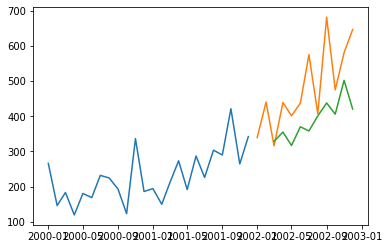

In [38]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(predicciones)

Con la gráfica, podemos ver que el modelo AR (2) no obtuvo un resultado satisfactorio. Para $ p = 2 $, el modelo no respondió al cambio de pendiente en las ventas contenido en el conjunto de entrenamiento. El mal resultado se confirma con el cálculo del error cuadrático medio.

In [41]:
((test_set - predicciones) ** 2).mean()

18782.49412004279

Ahora haremos una prueba con el modelo AR(5).

In [48]:
ar_5 = AR(train_set, freq='MS').fit(5)
print(ar_5.summary())

                               AR Model Results                               
Dep. Variable:                      S  -                  a                  l
Model:                          AR(5)   Log Likelihood                -103.337
Method:                          cmle   S.D. of innovations             55.694
Date:                Mon, 23 Aug 2021   AIC                              8.777
Time:                        01:02:03   BIC                              9.125
Sample:                    01-01-2000   HQIC                             8.835
                         - 12-01-2001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9869     95.378      0.010      0.992    -185.951     187.925
L1.Sales      -0.0659      0.262     -0.251      0.801      -0.580       0.448
L2.Sales       0.2887      0.239      1.209      0.2

In [49]:
ar_5.params

const       0.986921
L1.Sales   -0.065935
L2.Sales    0.288687
L3.Sales    0.092468
L4.Sales    0.547897
L5.Sales    0.287857
dtype: float64

En este caso, la ecuación que definió los pronósticos es de tipo
$$ X_t = 0.98 -0.06X_ {t-1} + 0.28X_ {t-2} + 0.09X_ {t-3} + 0.54X_ {t-4} + 0.28X_ {t-5} $$

Para automatizar la aplicación del modelo, usaremos el ciclo a continuación.

In [51]:
prediccion = ar_5.params[0]
for i, param in enumerate(ar_5.params[1:]):
    prediccion += test_set.shift(i + 1) * param
prediccion

Month
2002-01-01           NaN
2002-02-01           NaN
2002-03-01           NaN
2002-04-01           NaN
2002-05-01           NaN
2002-06-01    469.636779
2002-07-01    428.470876
2002-08-01    458.045403
2002-09-01    527.023131
2002-10-01    482.070272
2002-11-01    645.445731
2002-12-01    551.919198
Name: Sales, dtype: float64

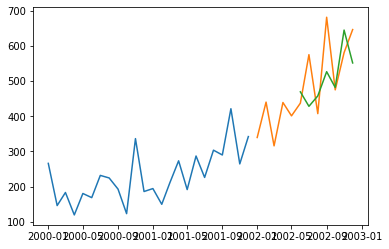

In [53]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(prediccion)

Con $ p = 5 $, vemos una mejora sustancial en los pronósticos.

In [55]:
((test_set - prediccion) ** 2).mean()

8914.45799995382